In [2]:
import pandas as pd

# –ó–∞–≥—Ä—É–∂–∞–µ–º Excel-—Ñ–∞–π–ª
file_path = r"C:\Users\User\Desktop\data_VNIS_3k.xlsx"  # –∑–∞–º–µ–Ω–∏ –Ω–∞ –ø—É—Ç—å –∫ —Ç–≤–æ–µ–º—É —Ñ–∞–π–ª—É
df = pd.read_excel(file_path)
# –ü—Ä–æ—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º –ø–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏
print(df.head())


         Date  Tenge (USD)  RUB (USD)  EUR (RUB)  CNY (RUB)      Gold  \
0  2018-01-01     384.5000    57.6002  68.210300   8.940000  2411.720   
1  2018-01-02     384.5452    57.6134  68.221043   8.941819  2414.109   
2  2018-01-03     384.5905    57.6266  68.231786   8.943638  2416.498   
3  2018-01-04     384.6357    57.6398  68.242530   8.945458  2418.887   
4  2018-01-05     384.6809    57.6530  68.253273   8.947277  2421.276   

      Brent   SILVER  PLATINUM      BTC      Cocoa  
0  71.34000  1024.72     15.52  28094.19   4616.93  
1  71.34311  1370.43     24.14  66697.86   9011.16  
2  71.34621  1239.20     11.25  52043.59   2439.43  
3  71.34932  1159.20     26.79  43110.12  10361.25  
4  71.35243   893.61     10.08  13453.25   1838.96  


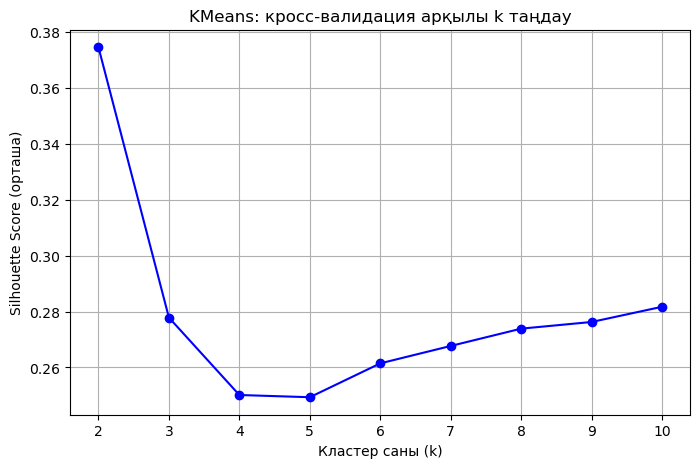

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 1. –ë–µ–ª–≥—ñ–ª–µ—Ä–¥—ñ –¥–∞–π—ã–Ω–¥–∞—É
X_kmeans = df.drop(columns=["Date"])  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)

# 2. ”ò—Ä—Ç“Ø—Ä–ª—ñ k “Ø—à—ñ–Ω –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è (k=2..10)
k_values = range(2, 11)
avg_silhouette_scores = []

for k in k_values:
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_scores = []

    for train_index, _ in kf.split(X_scaled):
        X_train = X_scaled[train_index]
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = model.fit_predict(X_train)
        score = silhouette_score(X_trai  n, labels)
        fold_scores.append(score)

    avg_score = np.mean(fold_scores)
    avg_silhouette_scores.append(avg_score)

# 3. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(8, 5))
plt.plot(k_values, avg_silhouette_scores, marker='o', color='blue')
plt.title("KMeans: –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è –∞—Ä“õ—ã–ª—ã k —Ç–∞“£–¥–∞—É")
plt.xlabel("–ö–ª–∞—Å—Ç–µ—Ä —Å–∞–Ω—ã (k)")
plt.ylabel("Silhouette Score (–æ—Ä—Ç–∞—à–∞)")
plt.grid(True)
plt.show()


–ë“±–ª –≥—Ä–∞—Ñ–∏–∫ ”ô—Ä —Ç“Ø—Ä–ª—ñ –∫–ª–∞—Å—Ç–µ—Ä —Å–∞–Ω—ã–Ω–∞ (k=2..10) –∞—Ä–Ω–∞–ª“ì–∞–Ω KMeans –º–æ–¥–µ–ª—ñ–Ω—ñ“£ —Å–∞–ø–∞—Å—ã–Ω –∫”©—Ä—Å–µ—Ç–µ–¥—ñ.
”ò—Ä k “Ø—à—ñ–Ω –º–æ–¥–µ–ª—å 5 –±”©–ª—ñ–∫–ø–µ–Ω —Ç–µ–∫—Å–µ—Ä—ñ–ª–¥—ñ (–∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è), –∂”ô–Ω–µ Silhouette Score –∞—Ä“õ—ã–ª—ã –±–∞“ì–∞–ª–∞–Ω–¥—ã.
–ï“£ “Ø–ª–∫–µ–Ω –æ—Ä—Ç–∞—à–∞ –º”ô–Ω—ñ –±–∞—Ä k ‚Äî –µ“£ –∂–∞“õ—Å—ã –∫–ª–∞—Å—Ç–µ—Ä —Å–∞–Ω—ã –±–æ–ª—ã–ø —Ç–∞–±—ã–ª–∞–¥—ã.

01.12.2024 –∫“Ø–Ω—ñ K-Means –±–æ–π—ã–Ω—à–∞ –±–æ–ª–∂–∞–Ω“ì–∞–Ω –∫–ª–∞—Å—Ç–µ—Ä: 2


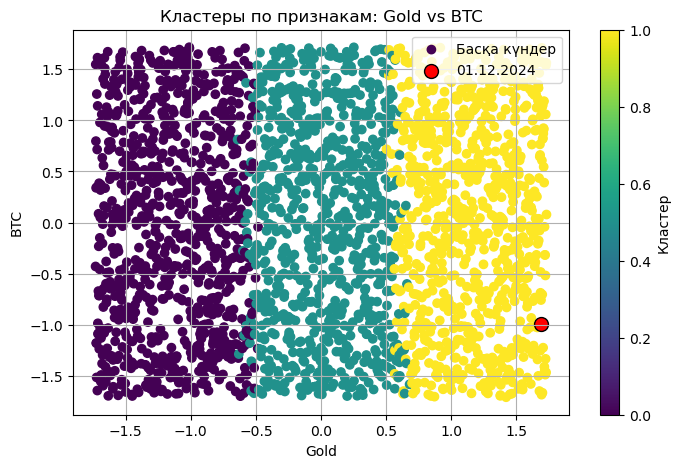

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. –ë–µ–ª–≥—ñ–ª–µ—Ä
X_kmeans = df.drop(columns=["Date", "Cluster"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_kmeans)

# 2. KMeans
model_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = model_kmeans.fit_predict(X_scaled)

# 3. 01.12.2024 –∫“Ø–Ω—ñ–Ω –∞–ª—É
target_date = "2024-12-01"
row = df[df["Date"] == target_date].drop(columns=["Date", "Cluster"])

if not row.empty:
    row_scaled = scaler.transform(row)
    cluster_pred = model_kmeans.predict(row_scaled)[0]
    print(f"01.12.2024 –∫“Ø–Ω—ñ K-Means –±–æ–π—ã–Ω—à–∞ –±–æ–ª–∂–∞–Ω“ì–∞–Ω –∫–ª–∞—Å—Ç–µ—Ä: {cluster_pred}")

    # 4. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
    plt.figure(figsize=(8, 5))
    plt.scatter(X_scaled[:, 4], X_scaled[:, 8], c=df["Cluster"], cmap="viridis", label="–ë–∞—Å“õ–∞ –∫“Ø–Ω–¥–µ—Ä")

    # “ö—ã–∑—ã–ª –Ω“Ø–∫—Ç–µ —Ä–µ—Ç—ñ–Ω–¥–µ 01.12.2024
    plt.scatter(row_scaled[0][4], row_scaled[0][8], color="red", s=100, label="01.12.2024", edgecolor="black")
    plt.title("–ö–ª–∞—Å—Ç–µ—Ä—ã –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º: Gold vs BTC")
    plt.xlabel("Gold")
    plt.ylabel("BTC")
    plt.colorbar(label="–ö–ª–∞—Å—Ç–µ—Ä")
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("01.12.2024 –∫“Ø–Ω—ñ —Ç–∞–±—ã–ª–º–∞–¥—ã üòî")


–ë“±–ª –≥—Ä–∞—Ñ–∏–∫—Ç–µ K-means –∞–ª–≥–æ—Ä–∏—Ç–º—ã –∞—Ä“õ—ã–ª—ã Gold (–∞–ª—Ç—ã–Ω) –∂”ô–Ω–µ BTC (–±–∏—Ç–∫–æ–π–Ω) –±–∞“ì–∞–ª–∞—Ä—ã –±–æ–π—ã–Ω—à–∞ –º”ô–ª—ñ–º–µ—Ç—Ç–µ—Ä 3 –∫–ª–∞—Å—Ç–µ—Ä–≥–µ –±”©–ª—ñ–Ω–≥–µ–Ω.
 ”ò—Ä–±—ñ—Ä –Ω“Ø–∫—Ç–µ ‚Äî –±—ñ—Ä –∫“Ø–Ω–¥–µ–≥—ñ –Ω–∞—Ä—ã“õ—Ç—ã“õ –∂–∞“ì–¥–∞–π–¥—ã –±—ñ–ª–¥—ñ—Ä–µ–¥—ñ.
 –ê–ª –Ω“Ø–∫—Ç–µ–ª–µ—Ä–¥—ñ“£ —Ç“Ø—Å—Ç–µ—Ä—ñ ‚Äî —Å–æ–ª –∫“Ø–Ω–Ω—ñ“£ “õ–∞–π –∫–ª–∞—Å—Ç–µ—Ä–≥–µ –∂–∞—Ç–∞—Ç—ã–Ω—ã–Ω –∫”©—Ä—Å–µ—Ç–µ–¥—ñ.
 –ö–ª–∞—Å—Ç–µ—Ä–ª–µ—Ä–≥–µ –±”©–ª—É ‚Äî “±“õ—Å–∞—Å –∫“Ø–Ω–¥–µ—Ä–¥—ñ —Ç–æ–ø—Ç–∞—Å—Ç—ã—Ä—ã–ø, –Ω–∞—Ä—ã“õ—Ç–∞“ì—ã —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è–ª–∞—Ä–¥—ã –∞–Ω—ã“õ—Ç–∞—É“ì–∞ –∫”©–º–µ–∫—Ç–µ—Å–µ–¥—ñ.



k = 1: –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫ = 0.862
k = 2: –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫ = 0.863
k = 3: –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫ = 0.863
k = 4: –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫ = 0.864
k = 5: –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫ = 0.864
k = 6: –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫ = 0.864
k = 7: –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫ = 0.865
k = 8: –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫ = 0.865
k = 9: –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫ = 0.865
k = 10: –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫ = 0.866

‚úÖ –ï“£ –∂–∞“õ—Å—ã —Ç–∞“£–¥–∞–ª“ì–∞–Ω k: 10, –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫: 0.866



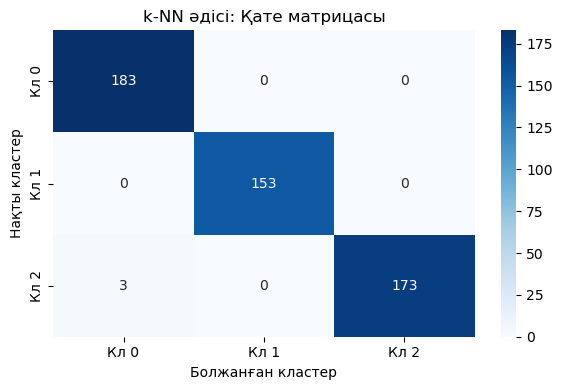


üìä –ú–æ–¥–µ–ª—å–¥—ñ“£ –±–∞“ì–∞–ª–∞—É –º–µ—Ç—Ä–∏–∫–∞–ª–∞—Ä—ã:
Accuracy (–î“±—Ä—ã—Å—Ç—ã“õ): 0.994   ‚Üí –§–æ—Ä–º—É–ª–∞: (TP + TN) / –ë–∞—Ä–ª—ã“ì—ã
Precision (–ù–∞“õ—Ç—ã–ª—ã“õ): 0.995 ‚Üí –§–æ—Ä–º—É–ª–∞: TP / (TP + FP)
Recall (–°–µ–∑—ñ–º—Ç–∞–ª–¥—ã“õ): 0.994   ‚Üí –§–æ—Ä–º—É–ª–∞: TP / (TP + FN)
F1-score (–ì–∞—Ä–º–æ–Ω–∏–∫–∞–ª—ã“õ –æ—Ä—Ç–∞—à–∞): 0.994 ‚Üí –§–æ—Ä–º—É–ª–∞: 2 * (Precision * Recall) / (Precision + Recall)

üìç –û—Ä—Ç–∞—à–∞ —à–∞–º–∞–≥–∞ –±–æ–ª–∂–∞–Ω“ì–∞–Ω –∫–ª–∞—Å—Ç–µ—Ä: 1
üéØ –û—Ä—Ç–∞—à–∞ —à–∞–º–∞–ª–∞—Ä “Ø—à—ñ–Ω —à–∞—Ä—Ç—Ç—ã Cocoa –±–æ–ª–∂–∞–º—ã (–∫–ª–∞—Å—Ç–µ—Ä 1): 6853.08


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 0. KMeans –∞—Ä“õ—ã–ª—ã –∫–ª–∞—Å—Ç–µ—Ä–ª–µ—É ---
X_kmeans = df.drop(columns=["Date", "Cocoa"])
scaler_kmeans = StandardScaler()
X_scaled_kmeans = scaler_kmeans.fit_transform(X_kmeans)

kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans_model.fit_predict(X_scaled_kmeans)

# --- 1. –ë–µ–ª–≥—ñ–ª–µ—Ä –º–µ–Ω –º–∞—Å—à—Ç–∞–±—Ç–∞—É ---
X = df.drop(columns=["Date", "Cocoa", "Cluster"])
y = df["Cluster"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2. –ê–ª“ì–∞—à“õ—ã 4 –±–µ–ª–≥—ñ–º–µ–Ω –∂“±–º—ã—Å —ñ—Å—Ç–µ–π–º—ñ–∑ ---
X_knn = X_scaled[:, :4]
y_knn = y

# --- 3. –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è –∞—Ä“õ—ã–ª—ã –µ“£ –∂–∞“õ—Å—ã k —Ç–∞“£–¥–∞—É ---
best_k = 1
best_score = 0

for k in range(1, 11):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, X_knn, y_knn, cv=5)
    avg = scores.mean()
    print(f"k = {k}: –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫ = {avg:.3f}")
    if avg > best_score:
        best_score = avg
        best_k = k

print(f"\n‚úÖ –ï“£ –∂–∞“õ—Å—ã —Ç–∞“£–¥–∞–ª“ì–∞–Ω k: {best_k}, –û—Ä—Ç–∞—à–∞ –¥”ô–ª–¥—ñ–∫: {best_score:.3f}\n")

# --- 4. –§–∏–Ω–∞–ª–¥—ã“õ –º–æ–¥–µ–ª—å–¥—ñ “Ø–π—Ä–µ—Ç—É ---
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# --- 5. –ú–æ–¥–µ–ª—å —Å–∞–ø–∞—Å—ã–Ω –±–∞“ì–∞–ª–∞—É ---
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["–ö–ª 0", "–ö–ª 1", "–ö–ª 2"],
            yticklabels=["–ö–ª 0", "–ö–ª 1", "–ö–ª 2"])
plt.xlabel("–ë–æ–ª–∂–∞–Ω“ì–∞–Ω –∫–ª–∞—Å—Ç–µ—Ä")
plt.ylabel("–ù–∞“õ—Ç—ã –∫–ª–∞—Å—Ç–µ—Ä")
plt.title("k-NN ”ô–¥—ñ—Å—ñ: “ö–∞—Ç–µ –º–∞—Ç—Ä–∏—Ü–∞—Å—ã")
plt.tight_layout()
plt.show()

# --- 6. –ú–µ—Ç—Ä–∏–∫–∞–ª–∞—Ä–¥—ã –µ—Å–µ–ø—Ç–µ—É (—Ñ–æ—Ä–º—É–ª–∞–º–µ–Ω –±—ñ—Ä–≥–µ) ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="macro")
rec = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print("\nüìä –ú–æ–¥–µ–ª—å–¥—ñ“£ –±–∞“ì–∞–ª–∞—É –º–µ—Ç—Ä–∏–∫–∞–ª–∞—Ä—ã:")
print(f"Accuracy (–î“±—Ä—ã—Å—Ç—ã“õ): {acc:.3f}   ‚Üí –§–æ—Ä–º—É–ª–∞: (TP + TN) / –ë–∞—Ä–ª—ã“ì—ã")
print(f"Precision (–ù–∞“õ—Ç—ã–ª—ã“õ): {prec:.3f} ‚Üí –§–æ—Ä–º—É–ª–∞: TP / (TP + FP)")
print(f"Recall (–°–µ–∑—ñ–º—Ç–∞–ª–¥—ã“õ): {rec:.3f}   ‚Üí –§–æ—Ä–º—É–ª–∞: TP / (TP + FN)")
print(f"F1-score (–ì–∞—Ä–º–æ–Ω–∏–∫–∞–ª—ã“õ –æ—Ä—Ç–∞—à–∞): {f1:.3f} ‚Üí –§–æ—Ä–º—É–ª–∞: 2 * (Precision * Recall) / (Precision + Recall)")

# --- 7. 01.12.2024 –∫“Ø–Ω—ñ–Ω–µ –∫–ª–∞—Å—Ç–µ—Ä –±–æ–ª–∂–∞—É ---
target_date = "2024-12-01"
row = df[df["Date"] == target_date].drop(columns=["Date", "Cocoa", "Cluster"])

if not row.empty:
    row_scaled = scaler.transform(row)
    new_day = row_scaled[:, :4]  # —Ç–µ–∫ –∞–ª“ì–∞—à“õ—ã 4 –±–µ–ª–≥—ñ

    predicted_cluster = knn.predict(new_day)[0]
    print(f"\nüìç –û—Ä—Ç–∞—à–∞ —à–∞–º–∞–≥–∞ –±–æ–ª–∂–∞–Ω“ì–∞–Ω –∫–ª–∞—Å—Ç–µ—Ä: {predicted_cluster}")

    # --- 8. –®–∞—Ä—Ç—Ç—ã Cocoa –±–æ–ª–∂–∞–º—ã (–∫–ª–∞—Å—Ç–µ—Ä —ñ—à—ñ–Ω–¥–µ –æ—Ä—Ç–∞—à–∞ –º”ô–Ω) ---
    cluster_data = df[df["Cluster"] == predicted_cluster]
    predicted_cocoa = cluster_data["Cocoa"].mean()
    print(f"üéØ –û—Ä—Ç–∞—à–∞ —à–∞–º–∞–ª–∞—Ä “Ø—à—ñ–Ω —à–∞—Ä—Ç—Ç—ã Cocoa –±–æ–ª–∂–∞–º—ã (–∫–ª–∞—Å—Ç–µ—Ä {predicted_cluster}): {predicted_cocoa:.2f}")

else:
    print("–û—Ä—Ç–∞—à–∞ —à–∞–º–∞–ª–∞—Ä –∫“Ø–Ω—ñ —Ç–∞–±—ã–ª–º–∞–¥—ã üòî")


–ö–ª–∞—Å—Ç–µ—Ä–¥—ñ“£ —ñ—à—ñ–Ω–¥–µ ”ô—Ä—Ç“Ø—Ä–ª—ñ –º”ô–Ω–¥–µ—Ä –±–∞—Ä ‚Äî –±—ñ—Ä—ñ –∂–æ“ì–∞—Ä—ã, –±—ñ—Ä—ñ —Ç”©–º–µ–Ω.
Cocoa –±–∞“ì–∞—Å—ã ”©—Ç–µ “õ“±–±—ã–ª–º–∞–ª—ã (”ô—Å—ñ—Ä–µ—Å–µ –∫—Ä–∏–ø—Ç–æ–≤–∞–ª—é—Ç–∞, —à–∏–∫—ñ–∑–∞—Ç —Å–µ–∫—ñ–ª–¥—ñ –∫”©—Ä—Å–µ—Ç–∫—ñ—à—Ç–µ—Ä–¥–µ).
–ê–ª–≥–æ—Ä–∏—Ç–º —Ç–µ–∫ –∂–∞–ª–ø—ã —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è–Ω—ã (–æ—Ä—Ç–∞—à–∞ –º”ô–Ω–¥—ñ) –±–æ–ª–∂–∞–π–¥—ã, –Ω–∞“õ—Ç—ã ”©–∑–≥–µ—Ä—ñ—Å—Ç—ñ ‚Äî –∂–æ“õ.

–ú–æ–¥–µ–ª—å–¥—ñ“£ –æ—Ä—Ç–∞—à–∞ “õ–∞—Ç–µ—Å—ñ (RMSE): 91.57
01.12.2024 –∫“Ø–Ω—ñ “Ø—à—ñ–Ω Decision Tree –∞—Ä“õ—ã–ª—ã Cocoa –±–æ–ª–∂–∞–º—ã: 1932.84


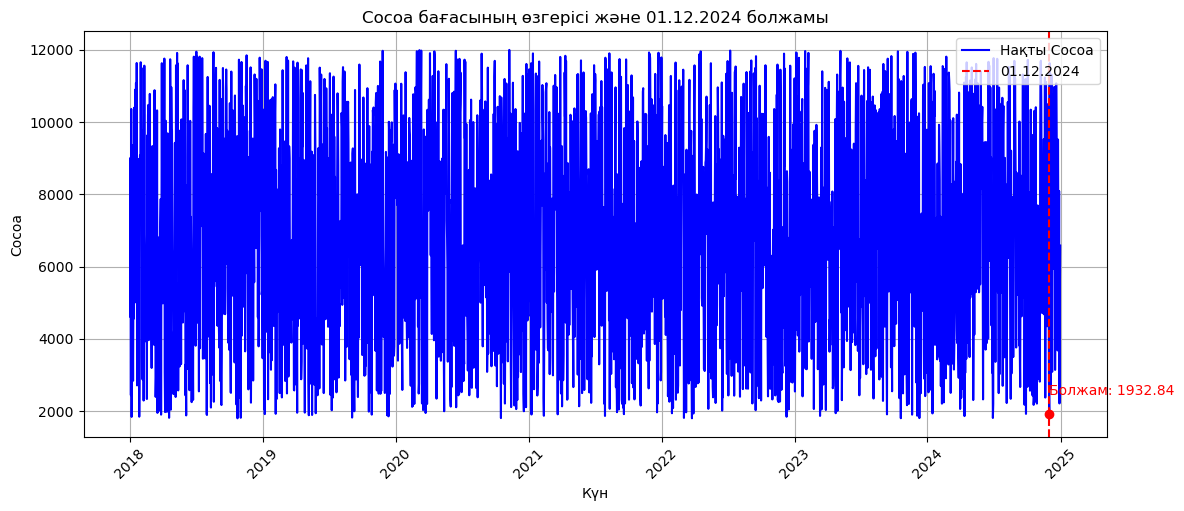

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. –î–∞–π—ã–Ω–¥—ã“õ: –±–æ—Å –º”ô–Ω–¥–µ—Ä –º–µ–Ω –¥–∞—Ç–∞ –±–∞“ì–∞–Ω—ã–Ω –∞–ª—ã–ø —Ç–∞—Å—Ç–∞–π–º—ã–∑
df_clean = df.dropna()
X = df_clean.drop(columns=["Date", "Cocoa"])
y = df_clean["Cocoa"]

# 2. Train/Test –±”©–ª—É
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. –ú–æ–¥–µ–ª—å “õ“±—Ä—É
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# 4. “ö–∞—Ç–µ–ª—ñ–∫—Ç—ñ —Ç–µ–∫—Å–µ—Ä—É (RMSE)
y_pred = tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("–ú–æ–¥–µ–ª—å–¥—ñ“£ –æ—Ä—Ç–∞—à–∞ “õ–∞—Ç–µ—Å—ñ (RMSE):", round(rmse, 2))

# 5. 01.12.2024 –∫“Ø–Ω–≥—ñ Cocoa-–Ω—ã –±–æ–ª–∂–∞—É
# –û–ª “Ø—à—ñ–Ω 2024-12-01 –∂–æ–ª—ã–Ω —Ç–∞–±–∞–º—ã–∑
date_target = "2024-12-01"
row = df[df["Date"] == date_target].drop(columns=["Date", "Cocoa"])

if not row.empty:
    cocoa_prediction = tree.predict(row)[0]
    print(f"01.12.2024 –∫“Ø–Ω—ñ “Ø—à—ñ–Ω Decision Tree –∞—Ä“õ—ã–ª—ã Cocoa –±–æ–ª–∂–∞–º—ã: {cocoa_prediction:.2f}")
else:
    print("01.12.2024 –º”ô–ª—ñ–º–µ—Ç—Ç–µ—Ä—ñ Excel —ñ—à—ñ–Ω–¥–µ —Ç–∞–±—ã–ª–º–∞–¥—ã.")

# 1. –î–∞—Ç–∞ –±–∞“ì–∞–Ω—ã–Ω datetime —Ñ–æ—Ä–º–∞—Ç—ã–Ω–∞ –∞—É—ã—Å—Ç—ã—Ä—É
df["Date"] = pd.to_datetime(df["Date"])

# 2. –ì—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Cocoa"], label="–ù–∞“õ—Ç—ã Cocoa", color='blue')

# 3. –ë–æ–ª–∂–∞–Ω“ì–∞–Ω –º”ô–Ω –º–µ–Ω —Ç—ñ–∫ —Å—ã–∑—ã“õ
plt.axvline(pd.to_datetime(date_target), color='red', linestyle='--', label="01.12.2024")
plt.scatter(pd.to_datetime(date_target), cocoa_prediction, color='red', zorder=5)
plt.text(pd.to_datetime(date_target), cocoa_prediction + 500,
         f"–ë–æ–ª–∂–∞–º: {cocoa_prediction:.2f}", color='red')

# 4. –ë–µ–∑–µ–Ω–¥—ñ—Ä—É
plt.title("Cocoa –±–∞“ì–∞—Å—ã–Ω—ã“£ ”©–∑–≥–µ—Ä—ñ—Å—ñ –∂”ô–Ω–µ 01.12.2024 –±–æ–ª–∂–∞–º—ã")
plt.xlabel("–ö“Ø–Ω")
plt.ylabel("Cocoa")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

–ë“±–ª –≥—Ä–∞—Ñ–∏–∫—Ç–µ Cocoa –±–∞“ì–∞—Å—ã–Ω—ã“£ 2018 –∂—ã–ª–¥–∞–Ω 2024 –∂—ã–ª“ì–∞ –¥–µ–π—ñ–Ω–≥—ñ ”©–∑–≥–µ—Ä—ñ—Å—ñ –∫”©—Ä—Å–µ—Ç—ñ–ª–≥–µ–Ω.
Decision Tree Regressor –∞–ª–≥–æ—Ä–∏—Ç–º—ã –∞—Ä“õ—ã–ª—ã 2024 –∂—ã–ª–¥—ã“£ 1 –∂–µ–ª—Ç–æ“õ—Å–∞–Ω—ã–Ω–∞ –±–æ–ª–∂–∞–º –∂–∞—Å–∞–ª–¥—ã.
“ö—ã–∑—ã–ª —Å—ã–∑—ã“õ ‚Äî 01.12.2024 –∫“Ø–Ω—ñ–Ω –∫”©—Ä—Å–µ—Ç–µ–¥—ñ, –∞–ª “õ—ã–∑—ã–ª –Ω“Ø–∫—Ç–µ ‚Äî –æ—Å—ã –∫“Ø–Ω–≥–µ –∞—Ä–Ω–∞–ª“ì–∞–Ω –±–æ–ª–∂–∞—É –Ω”ô—Ç–∏–∂–µ—Å—ñ (1932.84).
–ú–æ–¥–µ–ª—å–¥—ñ“£ –æ—Ä—Ç–∞—à–∞ “õ–∞—Ç–µ—Å—ñ (RMSE): 91.57, –±“±–ª –Ω”ô—Ç–∏–∂–µ–ª–µ—Ä–¥—ñ“£ —Å–µ–Ω—ñ–º–¥—ñ –µ–∫–µ–Ω—ñ–Ω –∫”©—Ä—Å–µ—Ç–µ–¥—ñ.

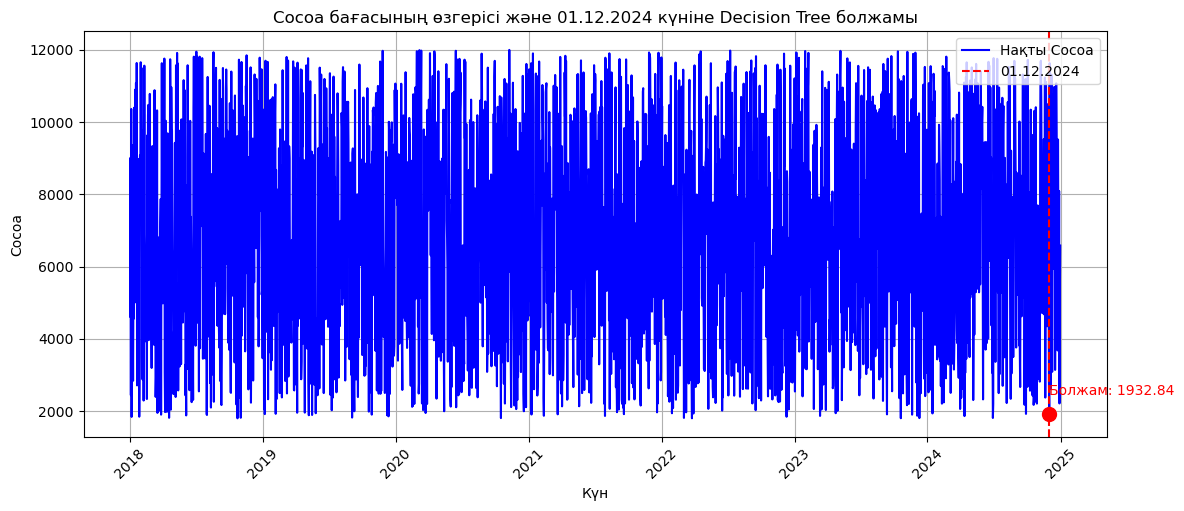

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. –î–∞—Ç–∞ –±–∞“ì–∞–Ω—ã–Ω –¥“±—Ä—ã—Å —Ñ–æ—Ä–º–∞—Ç“õ–∞ –∞—É—ã—Å—Ç—ã—Ä—É (–≥—Ä–∞—Ñ–∏–∫–∫–µ “õ–∞–∂–µ—Ç)
df["Date"] = pd.to_datetime(df["Date"])

# 2. –ì—Ä–∞—Ñ–∏–∫ —Å–∞–ª—É
plt.figure(figsize=(12, 5))

# Cocoa –º”ô–Ω–¥–µ—Ä—ñ–Ω —É–∞“õ—ã—Ç –±–æ–π—ã–Ω—à–∞ —Å—ã–∑—É
plt.plot(df["Date"], df["Cocoa"], label="–ù–∞“õ—Ç—ã Cocoa", color='blue')

# “ö—ã–∑—ã–ª —Ç—ñ–∫ —Å—ã–∑—ã“õ –∂”ô–Ω–µ –Ω“Ø–∫—Ç–µ ‚Äî –±–æ–ª–∂–∞–º
plt.axvline(pd.to_datetime(target_date), color='red', linestyle='--', label="01.12.2024")
plt.scatter(pd.to_datetime(target_date), cocoa_prediction, color='red', s=100, zorder=5)
plt.text(pd.to_datetime(target_date), cocoa_prediction + 500,
         f"–ë–æ–ª–∂–∞–º: {cocoa_prediction:.2f}", color='red')

# –ë–µ–∑–µ–Ω–¥—ñ—Ä—É
plt.title("Cocoa –±–∞“ì–∞—Å—ã–Ω—ã“£ ”©–∑–≥–µ—Ä—ñ—Å—ñ –∂”ô–Ω–µ 01.12.2024 –∫“Ø–Ω—ñ–Ω–µ Decision Tree –±–æ–ª–∂–∞–º—ã")
plt.xlabel("–ö“Ø–Ω")
plt.ylabel("Cocoa")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


üå≤ Random Forest –º–æ–¥–µ–ª—ñ RMSE “õ–∞—Ç–µ—Å—ñ: 15.79
üéØ 01.12.2024 –∫“Ø–Ω—ñ Random Forest –∞—Ä“õ—ã–ª—ã Cocoa –±–∞“ì–∞—Å—ã: 1998.83


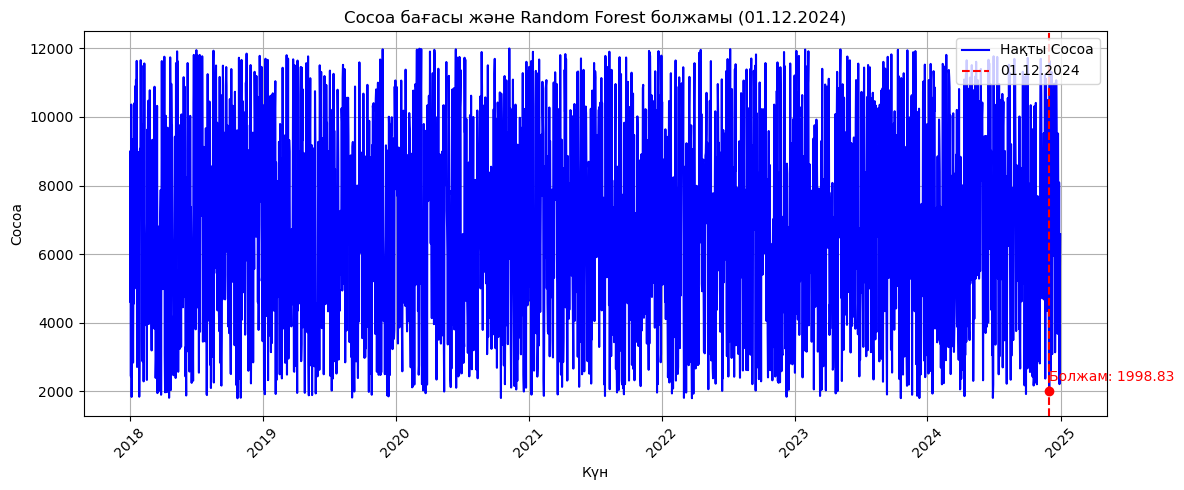

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. –ú”ô–ª—ñ–º–µ—Ç –¥–∞–π—ã–Ω–¥–∞—É
df_clean = df.dropna()
X = df_clean.drop(columns=["Date", "Cocoa"])
y = df_clean["Cocoa"]

# 2. Train/test –±”©–ª—É
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Random Forest –º–æ–¥–µ–ª—ñ
rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
rf.fit(X_train, y_train)

# 4. “ö–∞—Ç–µ –µ—Å–µ–ø—Ç–µ—É (RMSE)
y_pred = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("üå≤ Random Forest –º–æ–¥–µ–ª—ñ RMSE “õ–∞—Ç–µ—Å—ñ:", round(rmse, 2))

# 5. 01.12.2024 “Ø—à—ñ–Ω –±–æ–ª–∂–∞—É
target_date = "2024-12-01"
row = df[df["Date"] == target_date].drop(columns=["Date", "Cocoa"])

if not row.empty:
    cocoa_rf = rf.predict(row)[0]
    print(f"üéØ 01.12.2024 –∫“Ø–Ω—ñ Random Forest –∞—Ä“õ—ã–ª—ã Cocoa –±–∞“ì–∞—Å—ã: {cocoa_rf:.2f}")
else:
    print("01.12.2024 –∫“Ø–Ω—ñ —Ç–∞–±—ã–ª–º–∞–¥—ã üòî")

# 6. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
df["Date"] = pd.to_datetime(df["Date"])
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Cocoa"], label="–ù–∞“õ—Ç—ã Cocoa", color='blue')
plt.axvline(pd.to_datetime(target_date), color='red', linestyle='--', label="01.12.2024")
plt.scatter(pd.to_datetime(target_date), cocoa_rf, color='red', zorder=5)
plt.text(pd.to_datetime(target_date), cocoa_rf + 300,
         f"–ë–æ–ª–∂–∞–º: {cocoa_rf:.2f}", color='red')
plt.title("Cocoa –±–∞“ì–∞—Å—ã –∂”ô–Ω–µ Random Forest –±–æ–ª–∂–∞–º—ã (01.12.2024)")
plt.xlabel("–ö“Ø–Ω")
plt.ylabel("Cocoa")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
